In [1]:
from __future__ import absolute_import, print_function, division, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)
print(keras.__version__)

1.15.0-rc1
2.2.4-tf


## Import the Fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels.shape

(10000,)

## Preprocess the data

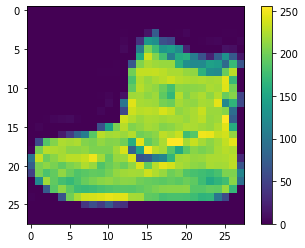

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

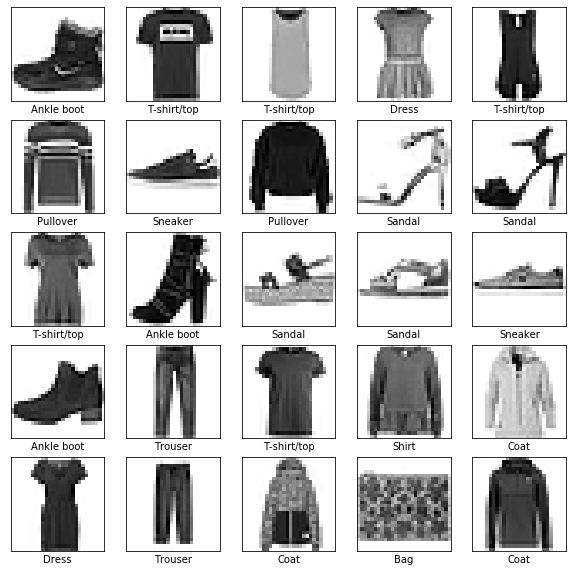

In [10]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Compile the model

In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Train the model

In [13]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4976 - acc: 0.8231
Epoch 2/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3767 - acc: 0.8636
Epoch 3/5
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3355 - acc: 0.8770
Epoch 4/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3138 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2945 - acc: 0.8905


## Evaluate accuracy

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3454 - acc: 0.8772
Test accuracy: 0.8772


## Make predictions

In [15]:
predictions = model.predict(test_images)
predictions[0]

array([1.7494041e-06, 1.2623300e-08, 1.5800593e-07, 2.2332177e-08,
       9.9718727e-07, 1.7596561e-03, 5.8799333e-07, 4.5149554e-03,
       1.7448030e-05, 9.9370438e-01], dtype=float32)

In [16]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [17]:
class_names[test_labels[0]]

'Ankle boot'

In [18]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

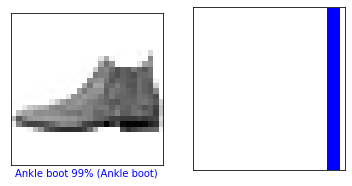

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

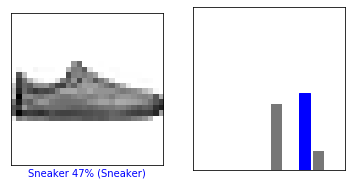

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

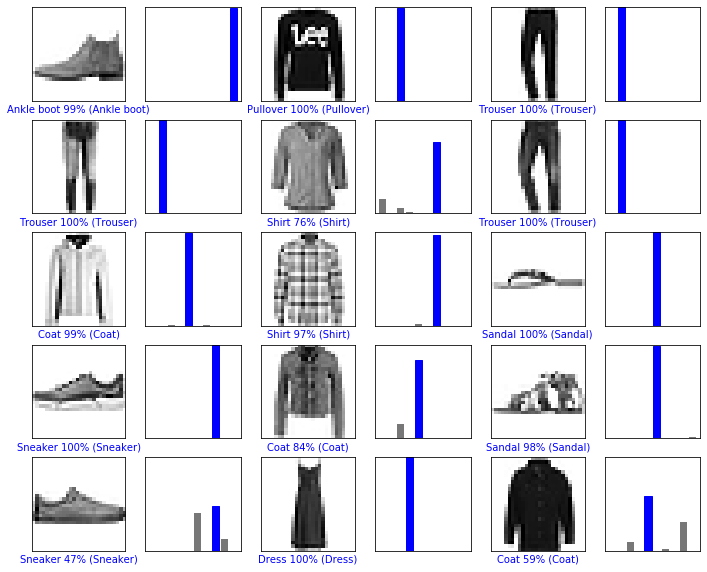

In [21]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.show()

In [22]:
# make a prediction about a single image
img = test_images[1]
print(img.shape)

(28, 28)


In [23]:
# add a image to a batch
img = np.expand_dims(img, 0 )
img.shape

(1, 28, 28)

In [24]:
predictions_single = model.predict(img)
print(predictions_single)

[[3.7827340e-05 4.2194973e-11 9.9604958e-01 8.1473077e-09 2.0454261e-03
  2.3028712e-13 1.8670007e-03 1.0663661e-14 9.9616003e-08 7.6519086e-12]]


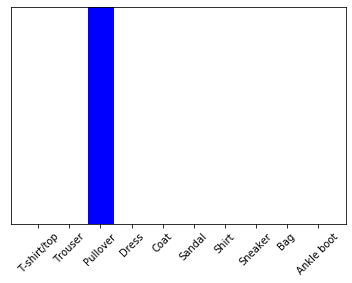

In [25]:
plot_value_array(1, predictions_single[0], test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [26]:
prediction_result = np.argmax(predictions_single[0])
class_names[prediction_result]

'Pullover'